# Exercice Jointure-groupage-agrégation avec Pandas
---

Dans cet exercice, c'est la base de données exmeple HR livrée avec Oracle XE.

**Travail demandé**
- Examiner la structure des fichiers CSV (résultant de l'exportation des tables Employees et Departments)
- Traduire les requêtes SQL fournies en utilisant la bibliothèque Pandas

## Importation et affichage des structures

In [2]:
import pandas as pd

In [3]:
departments = pd.read_csv('departments.csv')
print(departments.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   department_id    29 non-null     int64  
 1   department_name  29 non-null     object 
 2   manager_id       11 non-null     float64
 3   location_id      27 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.0+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   department_id    29 non-null     int64  
 1   department_name  29 non-null     object 
 2   manager_id       11 non-null     float64
 3   location_id      27 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.0+ KB
None

In [4]:
employees = pd.read_csv('employees.csv')
print(employees.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   employee_id     107 non-null    int64  
 1   first_name      107 non-null    object 
 2   last_name       107 non-null    object 
 3   email           107 non-null    object 
 4   phone_number    107 non-null    object 
 5   hire_date       107 non-null    object 
 6   job_id          107 non-null    object 
 7   salary          107 non-null    float64
 8   commission_pct  35 non-null     float64
 9   manager_id      106 non-null    float64
 10  department_id   106 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 9.3+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   employee_id     107 non-null    int64  
 1   first_name      107 non-null    object 
 2   last_name       107 non-null    object 
 3   email           107 non-null    object 
 4   phone_number    107 non-null    object 
 5   hire_date       107 non-null    object 
 6   job_id          107 non-null    object 
 7   salary          107 non-null    float64
 8   commission_pct  35 non-null     float64
 9   manager_id      106 non-null    float64
 10  department_id   106 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 9.3+ KB
None


## Requête 1

```SQL
SELECT first_name, last_name, department_name
FROM emp, dept
WHERE emp.department_id = dept.department_id
```

In [5]:
joinEmpDept = pd.merge(employees, departments, on='department_id')
print(joinEmpDept[["first_name","last_name","department_name"]])


    first_name last_name   department_name
0       Steven      King         Executive
1        Neena   Kochhar         Executive
2          Lex   De Haan         Executive
3    Alexander    Hunold                IT
4        Bruce     Ernst                IT
..         ...       ...               ...
101        Pat       Fay         Marketing
102      Susan    Mavris   Human Resources
103    Hermann      Baer  Public Relations
104    Shelley   Higgins        Accounting
105    William     Gietz        Accounting

[106 rows x 3 columns]


## Requête 2
```SQL
SELECT first_name, last_name, department_name
FROM emp LEFT OUTER JOIN dept ON emp.department_id = dept.department_id
```

## Requête 3
```SQL
SELECT e.first_name , e.last_name, c.first_name, c.last_name
FROM emp e, emp c
WHERE e.manager_id = c.employee_id
```

,first_name_x,last_name_x,first_name_y,last_name_y
0,Neena,Kochhar,Steven,King
1,Lex,De Haan,Steven,King
2,Den,Raphaely,Steven,King
3,Matthew,Weiss,Steven,King
4,Adam,Fripp,Steven,King
...,...,...,...,...
101,Jack,Livingston,Eleni,Zlotkey
102,Kimberely,Grant,Eleni,Zlotkey
103,Charles,Johnson,Eleni,Zlotkey
104,Pat,Fay,Michael,Hartstein


## Requête 4
```SQL
SELECT *
FROM emp
GROUP BY department_id
```

10.0 : 1
20.0 : 2
30.0 : 6
40.0 : 1
50.0 : 45
60.0 : 5
70.0 : 1
80.0 : 34
90.0 : 3
100.0 : 6
110.0 : 2


## Requête 5
```SQL
SELECT department_id, count(employee_id)
FROM emp
GROUP BY department_id
```

,employee_id
department_id,
10.0,1
20.0,2
30.0,6
40.0,1
50.0,45
60.0,5
70.0,1
80.0,34
90.0,3


## Requête 6
```SQL
SELECT department_id, MIN(salary), MAX(salary), AVG(salary), MIN(commission_pct)
FROM emp
GROUP BY department_id
```

salary                        commission_pct
                    min      max          mean            min
department_id                                                
10.0            4400.00   4400.0   4400.000000            NaN
20.0            6945.75  13000.0   9972.875000            NaN
30.0            2894.06  11000.0   4515.165000            NaN
40.0            6500.00   6500.0   6500.000000            NaN
50.0            2433.33   8202.0   3806.563111            NaN
60.0            4862.03   9000.0   6255.046000            NaN
70.0           10000.00  10000.0  10000.000000            NaN
80.0            7061.51  14000.0   9544.808235            0.1
90.0           19679.63  24000.0  21119.753333            NaN
100.0           7987.61  12008.0   9483.133333            NaN
110.0           9608.29  12008.0  10808.145000            NaN

### Afficher le salaire moyen du département 60

6255.045999999999

### Avec pivot_table

min                      max                    mean  \
              commission_pct    salary commission_pct   salary commission_pct   
department_id                                                                   
10.0                     NaN   4400.00            NaN   4400.0            NaN   
20.0                     NaN   6945.75            NaN  13000.0            NaN   
30.0                     NaN   2894.06            NaN  11000.0            NaN   
40.0                     NaN   6500.00            NaN   6500.0            NaN   
50.0                     NaN   2433.33            NaN   8202.0            NaN   
60.0                     NaN   4862.03            NaN   9000.0            NaN   
70.0                     NaN  10000.00            NaN  10000.0            NaN   
80.0                     0.1   7061.51            0.4  14000.0          0.225   
90.0                     NaN  19679.63            NaN  24000.0            NaN   
100.0                    NaN   7987.61            NaN  12008.0            NaN   
110.0                    NaN   9608.29            NaN  12008.0            NaN   

                             
                     salary  
department_id                
10.0            4400.000000  
20.0            9972.875000  
30.0            4515.165000  
40.0            6500.000000  
50.0            3806.563111  
60.0            6255.046000  
70.0           10000.000000  
80.0            9544.808235  
90.0           21119.753333  
100.0           9483.133333  
110.0          10808.145000

## Graphiques 
- Tracer un histogramme des salaires moyens par département
- Tracer un graphique en secteurs du nombre d'employés par job_id
- Créer un nuage de points des salaires en fonction de commission_pct

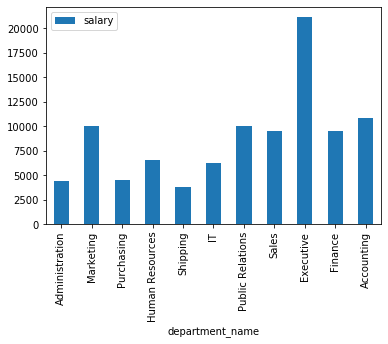

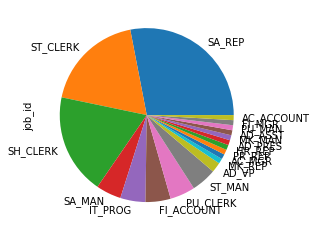

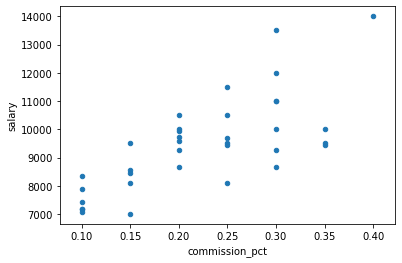